由第一部分的数据处理可知，distance_from_home项数据不全，只有220518项数据，一共有220735项，缺项，以对其处理为例

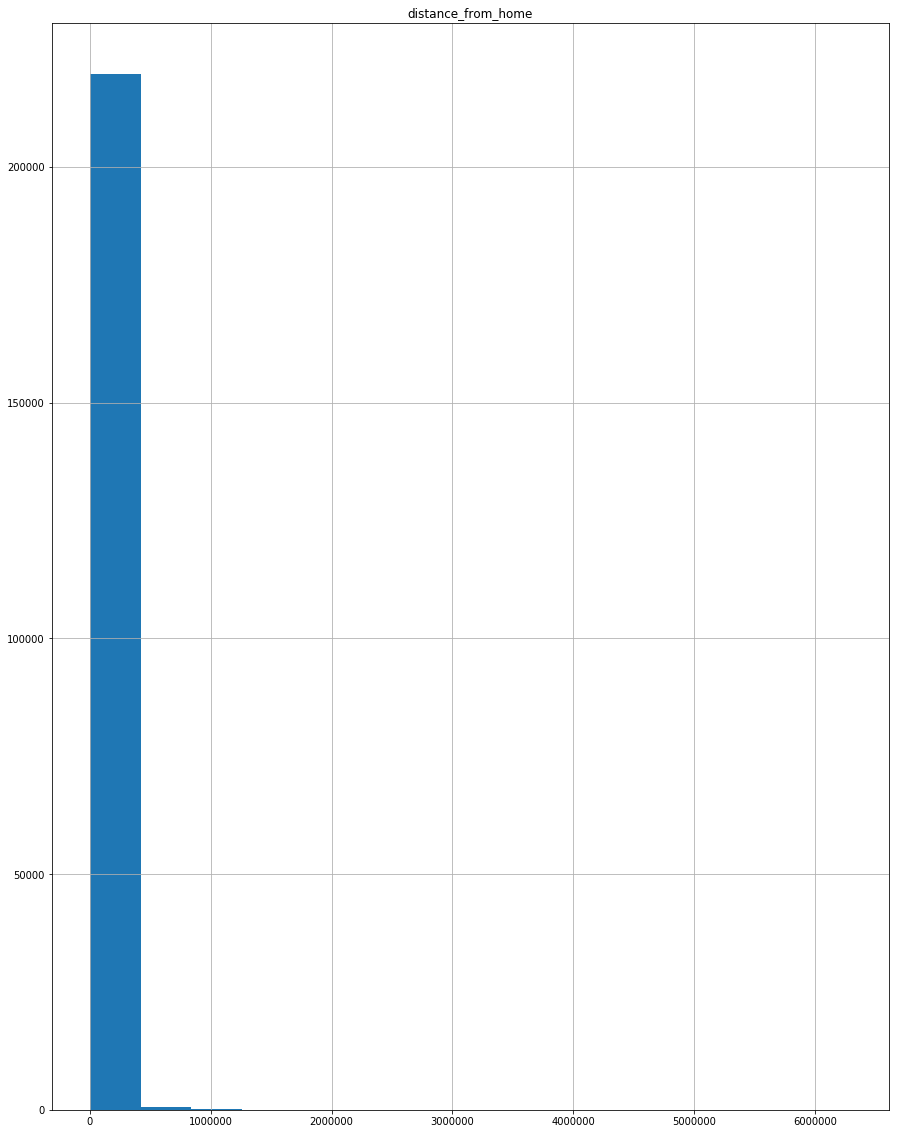

In [6]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
def load_data():
    csv_path = "cbg_patterns.csv"
    return pd.read_csv(csv_path)
data = load_data()
data.hist(column="distance_from_home",bins=15,figsize=(15,20))
plt.show()

初次处理发现其分布较为集中，故对其进行离散缩放处理，同时限制最大数值，给出两种限制的情况的直方图(250000(distance_from_home3)/500000(distance_from_home2))

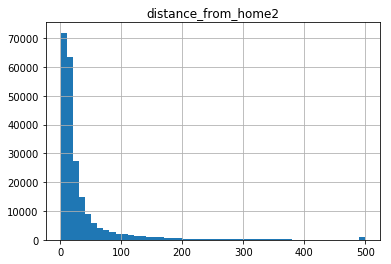

In [14]:
data["distance_from_home2"]=np.ceil(data["distance_from_home"]/1000)
data["distance_from_home2"].where(data["distance_from_home2"]<500,500,inplace=True)
data.hist(column="distance_from_home2",bins=50)
plt.show()

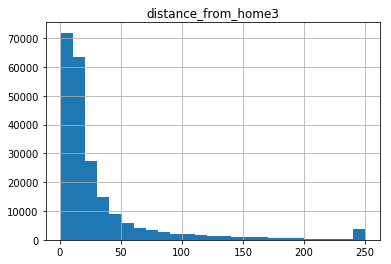

In [13]:
data["distance_from_home3"]=np.ceil(data["distance_from_home"]/1000)
data["distance_from_home3"].where(data["distance_from_home3"]<250,250,inplace=True)
data.hist(column="distance_from_home3",bins=25)
plt.show()

删除对应缺项的数据

In [18]:
data.drop(["distance_from_home2","distance_from_home3"],axis=1,inplace=True)
data2=data.dropna(subset=["distance_from_home"]) 
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220518 entries, 0 to 220628
Data columns (total 13 columns):
census_block_group          220518 non-null float64
date_range_start            220518 non-null int64
date_range_end              220518 non-null int64
raw_visit_count             220518 non-null float64
raw_visitor_count           220518 non-null float64
visitor_home_cbgs           220518 non-null object
visitor_work_cbgs           220518 non-null object
distance_from_home          220518 non-null float64
related_same_day_brand      220518 non-null object
related_same_month_brand    220518 non-null object
top_brands                  220518 non-null object
popularity_by_hour          220518 non-null object
popularity_by_day           220518 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 23.6+ MB


可以看到，此时所有的数据都只有220518项

In [19]:
data2=data.copy()
mode = data2["distance_from_home"].mode()[0]
data2["distance_from_home"].fillna(mode,inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220735 entries, 0 to 220734
Data columns (total 13 columns):
census_block_group          220734 non-null float64
date_range_start            220735 non-null int64
date_range_end              220735 non-null int64
raw_visit_count             220629 non-null float64
raw_visitor_count           220629 non-null float64
visitor_home_cbgs           220735 non-null object
visitor_work_cbgs           220735 non-null object
distance_from_home          220735 non-null float64
related_same_day_brand      220735 non-null object
related_same_month_brand    220735 non-null object
top_brands                  220735 non-null object
popularity_by_hour          220735 non-null object
popularity_by_day           220735 non-null object
dtypes: float64(4), int64(2), object(7)
memory usage: 21.9+ MB


此时所有的distance_from_home都已经用众数补充，观察其分布情况

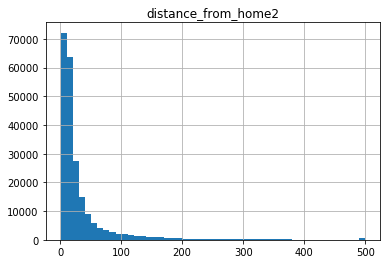

In [20]:
data2["distance_from_home2"]=np.ceil(data2["distance_from_home"]/1000)
data2["distance_from_home2"].where(data2["distance_from_home2"]<500,500,inplace=True)
data2.hist(column="distance_from_home2",bins=50)
plt.show()

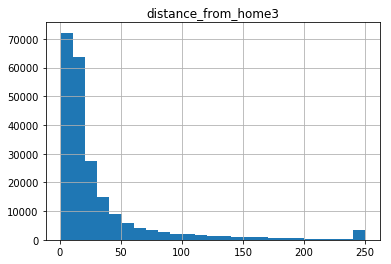

In [21]:
data2["distance_from_home3"]=np.ceil(data2["distance_from_home"]/1000)
data2["distance_from_home3"].where(data2["distance_from_home3"]<250,250,inplace=True)
data2.hist(column="distance_from_home3",bins=25)
plt.show()